In [2]:
import numpy as np
import csv
import re
from ahrs.ahrs.filters import Mahony

%matplotlib notebook
%matplotlib notebook

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from pyquaternion import Quaternion
from scipy.signal import resample


## Ground Truth Robot ARM UR10e

In [75]:
#Data gathering Robot ARM (Ground Truth)
f_GT_name = '/home/kuli/Desktop/WeAreVR/Measurements/robot_position_11.csv'
with open(f_GT_name, 'r') as file:
    data = file.read()
pattern = r"(-?\d+\.\d+)"
data = re.findall(pattern, data)
GT = np.reshape(data, (-1, 8)).astype(float)
time_columns = [0]
translate_columns = [1,2,3]
quaternion_columns = [4,5,6,7]
time_GT = GT[:, time_columns]
translate_GT = GT[:, translate_columns]
quaternion_GT_pre = GT[:, quaternion_columns]
total_time = float(time_GT[-1]) - float(time_GT[0])
robot_avg_freq = int(np.shape(GT)[0]) / total_time 

print(np.shape(GT))
print(robot_avg_freq)
print("Time:")
print(time_GT)
print("Transtale:")
print(translate_GT)
print("Quaternion:")
print(quaternion_GT_pre)
for q in quaternion_GT_pre:
    print(q)

(12974, 8)
500.44015488705026
Time:
[[1.68786914e+09]
 [1.68786914e+09]
 [1.68786914e+09]
 ...
 [1.68786916e+09]
 [1.68786916e+09]
 [1.68786916e+09]]
Transtale:
[[-0.175  0.866  0.199]
 [-0.175  0.866  0.199]
 [-0.175  0.866  0.199]
 ...
 [-0.175  0.866  0.199]
 [-0.175  0.866  0.199]
 [-0.175  0.866  0.199]]
Quaternion:
[[-0.    -0.    -0.001  1.   ]
 [-0.    -0.    -0.001  1.   ]
 [-0.    -0.    -0.001  1.   ]
 ...
 [ 0.    -0.    -0.001  1.   ]
 [ 0.    -0.    -0.001  1.   ]
 [ 0.    -0.    -0.001  1.   ]]
[-0.    -0.    -0.001  1.   ]
[-0.    -0.    -0.001  1.   ]
[-0.    -0.    -0.001  1.   ]
[-0.    -0.    -0.001  1.   ]
[-0.    -0.    -0.001  1.   ]
[-0.    -0.    -0.001  1.   ]
[-0.    -0.    -0.001  1.   ]
[-0.    -0.    -0.001  1.   ]
[-0.    -0.    -0.001  1.   ]
[-0.    -0.    -0.001  1.   ]
[-0.    -0.    -0.001  1.   ]
[-0.    -0.    -0.001  1.   ]
[-0.    -0.    -0.001  1.   ]
[-0.    -0.    -0.001  1.   ]
[-0.    -0.    -0.001  1.   ]
[-0.    -0.    -0.001  1.   ]
[-0. 

[ 0.    -0.    -0.001  1.   ]
[ 0.    -0.    -0.001  1.   ]
[ 0.    -0.    -0.001  1.   ]
[ 0.    -0.    -0.001  1.   ]
[ 0.    -0.    -0.001  1.   ]
[ 0.    -0.    -0.001  1.   ]
[ 0.    -0.    -0.001  1.   ]
[ 0.    -0.    -0.001  1.   ]
[ 0.    -0.    -0.001  1.   ]
[ 0.    -0.    -0.001  1.   ]
[ 0.    -0.    -0.001  1.   ]
[ 0.    -0.    -0.001  1.   ]
[ 0.    -0.    -0.001  1.   ]
[ 0.    -0.    -0.001  1.   ]
[ 0.    -0.    -0.001  1.   ]
[ 0.    -0.    -0.001  1.   ]
[ 0.    -0.    -0.001  1.   ]
[ 0.    -0.    -0.001  1.   ]
[ 0.    -0.    -0.001  1.   ]
[ 0.    -0.    -0.001  1.   ]
[ 0.    -0.    -0.001  1.   ]
[ 0.    -0.    -0.001  1.   ]
[ 0.    -0.    -0.001  1.   ]
[ 0.    -0.    -0.001  1.   ]
[ 0.    -0.    -0.001  1.   ]
[ 0.    -0.    -0.001  1.   ]
[ 0.    -0.    -0.001  1.   ]
[ 0.    -0.    -0.001  1.   ]
[ 0.    -0.    -0.001  1.   ]
[ 0.    -0.    -0.001  1.   ]
[ 0.    -0.    -0.001  1.   ]
[ 0.    -0.    -0.001  1.   ]
[ 0.    -0.    -0.001  1.   ]
[ 0.    -0

[-0.001  0.     0.975 -0.221]
[-0.001  0.     0.975 -0.221]
[-0.001  0.     0.975 -0.221]
[-0.001  0.     0.975 -0.221]
[-0.001  0.     0.975 -0.221]
[-0.001  0.     0.975 -0.221]
[-0.001  0.     0.975 -0.221]
[-0.001  0.     0.982 -0.189]
[-0.001  0.     0.982 -0.189]
[-0.001  0.     0.982 -0.189]
[-0.001  0.     0.982 -0.189]
[-0.001  0.     0.982 -0.189]
[-0.001  0.     0.982 -0.189]
[-0.001  0.     0.982 -0.189]
[-0.001  0.     0.982 -0.189]
[-0.001  0.     0.982 -0.189]
[-0.001  0.     0.982 -0.189]
[-0.001  0.     0.982 -0.189]
[-0.001  0.     0.982 -0.189]
[-0.001  0.     0.982 -0.189]
[-0.001  0.     0.982 -0.189]
[-0.001  0.     0.982 -0.189]
[-0.001  0.     0.982 -0.189]
[-0.001  0.     0.982 -0.189]
[-0.001  0.     0.982 -0.189]
[-0.001  0.     0.982 -0.189]
[-0.001  0.     0.982 -0.189]
[-0.001  0.     0.982 -0.189]
[-0.001  0.     0.982 -0.189]
[-0.001  0.     0.982 -0.189]
[-0.001  0.     0.982 -0.189]
[-0.001  0.     0.982 -0.189]
[-0.001  0.     0.982 -0.189]
[-0.001  0

[-0.    -0.003 -0.116  0.993]
[-0.    -0.003 -0.116  0.993]
[-0.    -0.003 -0.116  0.993]
[-0.    -0.003 -0.116  0.993]
[-0.    -0.003 -0.116  0.993]
[-0.    -0.003 -0.116  0.993]
[-0.    -0.003 -0.116  0.993]
[-0.    -0.003 -0.116  0.993]
[-0.    -0.003 -0.116  0.993]
[-0.    -0.003 -0.116  0.993]
[-0.    -0.003 -0.116  0.993]
[-0.    -0.003 -0.116  0.993]
[-0.    -0.003 -0.116  0.993]
[-0.    -0.003 -0.116  0.993]
[-0.    -0.003 -0.116  0.993]
[-0.    -0.003 -0.116  0.993]
[-0.    -0.003 -0.116  0.993]
[-0.    -0.003 -0.116  0.993]
[-0.    -0.003 -0.116  0.993]
[-0.    -0.003 -0.116  0.993]
[-0.    -0.003 -0.116  0.993]
[-0.    -0.003 -0.116  0.993]
[-0.    -0.003 -0.116  0.993]
[-0.    -0.003 -0.116  0.993]
[-0.    -0.003 -0.116  0.993]
[-0.    -0.003 -0.148  0.989]
[-0.    -0.003 -0.148  0.989]
[-0.    -0.003 -0.148  0.989]
[-0.    -0.003 -0.148  0.989]
[-0.    -0.003 -0.148  0.989]
[-0.    -0.003 -0.148  0.989]
[-0.    -0.003 -0.148  0.989]
[-0.    -0.003 -0.148  0.989]
[-0.    -0

[-0.004 -0.     0.976  0.216]
[-0.004 -0.     0.976  0.216]
[-0.004 -0.     0.976  0.216]
[-0.004 -0.     0.976  0.216]
[-0.004 -0.     0.976  0.216]
[-0.004 -0.     0.976  0.216]
[-0.004 -0.     0.976  0.216]
[-0.004 -0.     0.969  0.247]
[-0.004 -0.     0.969  0.247]
[-0.004 -0.     0.969  0.247]
[-0.004 -0.     0.969  0.247]
[-0.004 -0.     0.969  0.247]
[-0.004 -0.     0.969  0.247]
[-0.004 -0.     0.969  0.247]
[-0.004 -0.     0.969  0.247]
[-0.004 -0.     0.969  0.247]
[-0.004 -0.     0.969  0.247]
[-0.004 -0.     0.969  0.247]
[-0.004 -0.     0.969  0.247]
[-0.004 -0.     0.969  0.247]
[-0.004 -0.     0.969  0.247]
[-0.004 -0.     0.969  0.247]
[-0.004 -0.     0.969  0.247]
[-0.004 -0.     0.969  0.247]
[-0.004 -0.     0.969  0.247]
[-0.004 -0.     0.969  0.247]
[-0.004 -0.     0.969  0.247]
[-0.004 -0.     0.969  0.247]
[-0.004 -0.     0.969  0.247]
[-0.004 -0.     0.969  0.247]
[-0.004 -0.     0.969  0.247]
[-0.004 -0.     0.969  0.247]
[-0.004 -0.     0.969  0.247]
[-0.004 -0

[-0.001 -0.005  0.034  0.999]
[-0.001 -0.005  0.034  0.999]
[-0.001 -0.005  0.034  0.999]
[-0.001 -0.005  0.034  0.999]
[-0.001 -0.005  0.034  0.999]
[-0.001 -0.005  0.034  0.999]
[-0.001 -0.005  0.034  0.999]
[-0.001 -0.005  0.034  0.999]
[-0.001 -0.005  0.034  0.999]
[-0.001 -0.005  0.034  0.999]
[-0.001 -0.005  0.034  0.999]
[-0.001 -0.005  0.034  0.999]
[-0.001 -0.005  0.034  0.999]
[-0.001 -0.005  0.034  0.999]
[-0.001 -0.005  0.034  0.999]
[-0.001 -0.005  0.034  0.999]
[-0.001 -0.005  0.034  0.999]
[-0.001 -0.005  0.034  0.999]
[-0.001 -0.005  0.038  0.999]
[-0.001 -0.005  0.038  0.999]
[-0.001 -0.005  0.038  0.999]
[-0.001 -0.005  0.038  0.999]
[-0.001 -0.005  0.038  0.999]
[-0.001 -0.005  0.038  0.999]
[-0.001 -0.005  0.038  0.999]
[-0.001 -0.005  0.038  0.999]
[-0.001 -0.005  0.038  0.999]
[-0.001 -0.005  0.038  0.999]
[-0.001 -0.005  0.038  0.999]
[-0.001 -0.005  0.038  0.999]
[-0.001 -0.005  0.038  0.999]
[-0.001 -0.005  0.038  0.999]
[-0.001 -0.005  0.038  0.999]
[-0.001 -0

[-0.004  0.001  0.999  0.046]
[-0.004  0.001  0.999  0.046]
[-0.004  0.001  0.999  0.046]
[-0.004  0.001  0.999  0.046]
[-0.004  0.001  0.999  0.046]
[-0.004  0.001  0.999  0.046]
[-0.004  0.001  0.999  0.046]
[-0.004  0.001  0.999  0.046]
[-0.004  0.001  0.999  0.046]
[-0.004  0.001  0.999  0.046]
[-0.004  0.001  0.999  0.046]
[-0.004  0.001  0.999  0.046]
[-0.004  0.001  0.999  0.046]
[-0.004  0.001  0.999  0.046]
[-0.004  0.001  0.999  0.046]
[-0.004  0.001  0.999  0.046]
[-0.004  0.001  0.999  0.046]
[-0.004  0.001  0.999  0.046]
[-0.004  0.001  0.999  0.046]
[-0.004  0.001  0.999  0.046]
[-0.004  0.001  0.999  0.046]
[-0.004  0.001  0.999  0.046]
[-0.004  0.001  1.     0.012]
[-0.004  0.001  1.     0.012]
[-0.004  0.001  1.     0.012]
[-0.004  0.001  1.     0.012]
[-0.004  0.001  1.     0.012]
[-0.004  0.001  1.     0.012]
[-0.004  0.001  1.     0.012]
[-0.004  0.001  1.     0.012]
[-0.004  0.001  1.     0.012]
[-0.004  0.001  1.     0.012]
[-0.004  0.001  1.     0.012]
[-0.004  0

[-0.001 -0.003  0.049  0.999]
[-0.001 -0.003  0.049  0.999]
[-0.001 -0.003  0.049  0.999]
[-0.001 -0.003  0.049  0.999]
[-0.001 -0.003  0.049  0.999]
[-0.001 -0.003  0.049  0.999]
[-0.001 -0.003  0.049  0.999]
[-0.001 -0.003  0.049  0.999]
[-0.001 -0.003  0.049  0.999]
[-0.001 -0.003  0.049  0.999]
[-0.001 -0.003  0.049  0.999]
[-0.001 -0.003  0.049  0.999]
[-0.001 -0.003  0.049  0.999]
[-0.001 -0.003  0.049  0.999]
[-0.001 -0.003  0.049  0.999]
[-0.001 -0.003  0.049  0.999]
[-0.001 -0.003  0.049  0.999]
[-0.001 -0.003  0.049  0.999]
[-0.001 -0.003  0.049  0.999]
[-0.001 -0.003  0.049  0.999]
[-0.001 -0.003  0.049  0.999]
[-0.001 -0.003  0.081  0.997]
[-0.001 -0.003  0.081  0.997]
[-0.001 -0.003  0.081  0.997]
[-0.001 -0.003  0.081  0.997]
[-0.001 -0.003  0.081  0.997]
[-0.001 -0.003  0.081  0.997]
[-0.001 -0.003  0.081  0.997]
[-0.001 -0.003  0.081  0.997]
[-0.001 -0.003  0.081  0.997]
[-0.001 -0.003  0.081  0.997]
[-0.001 -0.003  0.081  0.997]
[-0.001 -0.003  0.081  0.997]
[-0.001 -0

[-0.001  0.001  0.967 -0.254]
[-0.001  0.001  0.967 -0.254]
[-0.001  0.001  0.967 -0.254]
[-0.001  0.001  0.967 -0.254]
[-0.001  0.001  0.967 -0.254]
[-0.001  0.001  0.967 -0.254]
[-0.001  0.001  0.967 -0.254]
[-0.001  0.001  0.967 -0.254]
[-0.001  0.001  0.967 -0.254]
[-0.001  0.001  0.967 -0.254]
[-0.001  0.001  0.967 -0.254]
[-0.001  0.001  0.967 -0.254]
[-0.001  0.001  0.958 -0.286]
[-0.001  0.001  0.958 -0.286]
[-0.001  0.001  0.958 -0.286]
[-0.001  0.001  0.958 -0.286]
[-0.001  0.001  0.958 -0.286]
[-0.001  0.001  0.958 -0.286]
[-0.001  0.001  0.958 -0.286]
[-0.001  0.001  0.958 -0.286]
[-0.001  0.001  0.958 -0.286]
[-0.001  0.001  0.958 -0.286]
[-0.001  0.001  0.958 -0.286]
[-0.001  0.001  0.958 -0.286]
[-0.001  0.001  0.958 -0.286]
[-0.001  0.001  0.958 -0.286]
[-0.001  0.001  0.958 -0.286]
[-0.001  0.001  0.958 -0.286]
[-0.001  0.001  0.958 -0.286]
[-0.001  0.001  0.958 -0.286]
[-0.001  0.001  0.958 -0.286]
[-0.001  0.001  0.958 -0.286]
[-0.001  0.001  0.958 -0.286]
[-0.001  0

[ 0.    -0.    -0.011  1.   ]
[ 0.    -0.    -0.011  1.   ]
[ 0.    -0.    -0.011  1.   ]
[ 0.    -0.    -0.011  1.   ]
[ 0.    -0.    -0.011  1.   ]
[ 0.    -0.    -0.011  1.   ]
[ 0.    -0.    -0.011  1.   ]
[ 0.    -0.    -0.011  1.   ]
[ 0.    -0.    -0.011  1.   ]
[ 0.    -0.    -0.011  1.   ]
[ 0.    -0.    -0.011  1.   ]
[ 0.    -0.    -0.011  1.   ]
[ 0.    -0.    -0.011  1.   ]
[ 0.    -0.    -0.011  1.   ]
[ 0.    -0.    -0.011  1.   ]
[ 0.    -0.    -0.011  1.   ]
[ 0.    -0.    -0.011  1.   ]
[ 0.    -0.    -0.011  1.   ]
[ 0.    -0.    -0.006  1.   ]
[ 0.    -0.    -0.006  1.   ]
[ 0.    -0.    -0.006  1.   ]
[ 0.    -0.    -0.006  1.   ]
[ 0.    -0.    -0.006  1.   ]
[ 0.    -0.    -0.006  1.   ]
[ 0.    -0.    -0.006  1.   ]
[ 0.    -0.    -0.006  1.   ]
[ 0.    -0.    -0.006  1.   ]
[ 0.    -0.    -0.006  1.   ]
[ 0.    -0.    -0.006  1.   ]
[ 0.    -0.    -0.006  1.   ]
[ 0.    -0.    -0.006  1.   ]
[ 0.    -0.    -0.006  1.   ]
[ 0.    -0.    -0.006  1.   ]
[ 0.    -0

[-0.    -0.    -0.001  1.   ]
[-0.    -0.    -0.001  1.   ]
[-0.    -0.    -0.001  1.   ]
[-0.    -0.    -0.001  1.   ]
[-0.    -0.    -0.001  1.   ]
[-0.    -0.    -0.001  1.   ]
[-0.    -0.    -0.001  1.   ]
[-0.    -0.    -0.001  1.   ]
[-0.    -0.    -0.001  1.   ]
[-0.    -0.    -0.001  1.   ]
[-0.    -0.    -0.001  1.   ]
[-0.    -0.    -0.001  1.   ]
[ 0.    -0.    -0.001  1.   ]
[ 0.    -0.    -0.001  1.   ]
[ 0.    -0.    -0.001  1.   ]
[ 0.    -0.    -0.001  1.   ]
[ 0.    -0.    -0.001  1.   ]
[ 0.    -0.    -0.001  1.   ]
[ 0.    -0.    -0.001  1.   ]
[ 0.    -0.    -0.001  1.   ]
[ 0.    -0.    -0.001  1.   ]
[ 0.    -0.    -0.001  1.   ]
[ 0.    -0.    -0.001  1.   ]
[ 0.    -0.    -0.001  1.   ]
[ 0.    -0.    -0.001  1.   ]
[ 0.    -0.    -0.001  1.   ]
[ 0.    -0.    -0.001  1.   ]
[ 0.    -0.    -0.001  1.   ]
[ 0.    -0.    -0.001  1.   ]
[ 0.    -0.    -0.001  1.   ]
[ 0.    -0.    -0.001  1.   ]
[ 0.    -0.    -0.001  1.   ]
[ 0.    -0.    -0.001  1.   ]
[ 0.    -0

<IPython.core.display.Javascript object>


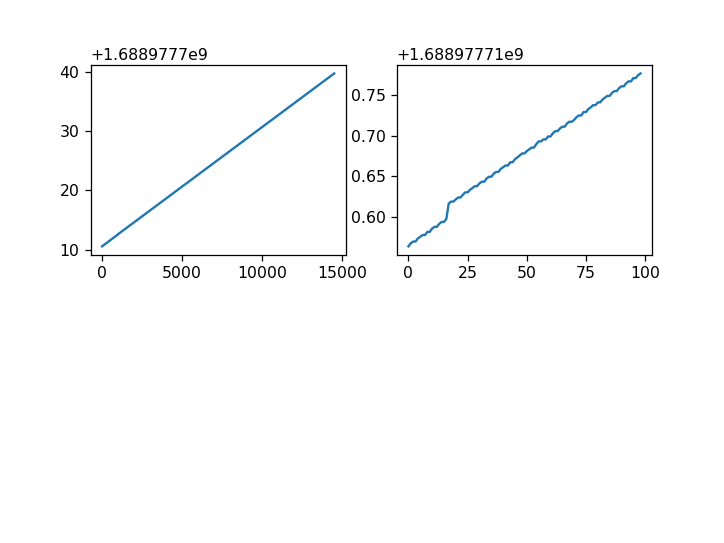

(14524, 10)
498.6729517383248
Time:
[[1.68897771e+09]
 [1.68897771e+09]
 [1.68897771e+09]
 ...
 [1.68897774e+09]
 [1.68897774e+09]
 [1.68897774e+09]]
Transtale:
[[ 0.18196902 -0.86555051 -0.57894417]
 [ 0.18196902 -0.86555051 -0.57894417]
 [ 0.18205931 -0.86552066 -0.57898856]
 ...
 [ 0.18200523 -0.8655398  -0.57898748]
 [ 0.18197212 -0.86552761 -0.57901367]
 [ 0.18197212 -0.86552761 -0.57901367]]
Quaternion:
[[-6.37086569e-05  2.84640892e-05  2.91604556e-03  9.99995746e-01]
 [-6.37086569e-05  2.84640892e-05  2.91604556e-03  9.99995746e-01]
 [-1.74882549e-05  1.44418278e-05  2.96682692e-03  9.99995599e-01]
 ...
 [-4.79605116e-05  2.64143248e-05  2.94203252e-03  9.99995671e-01]
 [-1.98996458e-05  2.87333646e-05  2.93458126e-03  9.99995693e-01]
 [-1.98996458e-05  2.87333646e-05  2.93458126e-03  9.99995693e-01]]


In [88]:
#Data gathering Robot ARM (Ground Truth)
f_GT_name = '/home/kuli/Desktop/WeAreVR/Measurements/robot_position_dev.csv'
with open(f_GT_name, 'r') as file:
    data = file.read()
pattern = r"(-?\d+(?:\.\d+)?(?:[eE][-+]?\d+)?)"
data = re.findall(pattern, data)
GT = np.reshape(data, (-1, 10)).astype(float)
time_columns = [0,1]
translate_columns = [3,4,5]
quaternion_columns = [6,7,8,9]
time_GT = GT[:, time_columns]
translate_GT = GT[:, translate_columns]
quaternion_GT_pre = GT[:, quaternion_columns]
# combine 2 rows to get time in seconds
combined_time = []
for row in time_GT:
    combined_time.append(row[0] + row[1] / 1e+09)
time_GT = np.reshape(combined_time, (-1, 1)).astype(float)
total_time = float(time_GT[-1]) - float(time_GT[0])
robot_avg_freq = int(np.shape(GT)[0]) / total_time 

fig = plt.figure()
ax = plt.subplot(221)
ax.plot(time_GT)
ax = plt.subplot(222)
ax.plot(time_GT[1:100])

print(np.shape(GT))
print(robot_avg_freq)
print("Time:")
print(time_GT)
print("Transtale:")
print(translate_GT)
print("Quaternion:")
print(quaternion_GT_pre)
#for q in quaternion_GT_pre:
#    print(q)

In [84]:
#Unifie the axis quaternions_GT (z > y) to (y > -x) quaternions_IMU
rot_WM = Quaternion([0.51, -0.51, 0.51, 0.51])
#Unifie the axis quaternions_GT (z > y) to (x > +-y) quaternions_IMU_NM
rot_NM =Quaternion([0.707, 0.0, 0.707, 0.0])

quaternion_GT_to_NM = np.copy(quaternion_GT_pre)
for index, item in enumerate(quaternion_GT_to_NM):
    #q = rot_WM * Quaternion(item) * rot_WM.inverse
    q = rot_NM * Quaternion(item) * rot_NM.inverse
    quaternion_GT_to_NM[index] = [np.format_float_positional(q[0]), np.format_float_positional(q[1]), np.format_float_positional(q[2]), np.format_float_positional(q[3])]
print(np.shape(quaternion_GT_to_NM))
for q in quaternion_GT_to_NM:
    print(q)

(14524, 4)
[-6.37086569e-05  9.99995746e-01  2.91604556e-03 -2.84640892e-05]
[-6.37086569e-05  9.99995746e-01  2.91604556e-03 -2.84640892e-05]
[-1.74882549e-05  9.99995599e-01  2.96682692e-03 -1.44418278e-05]
[-6.18340968e-05  9.99995770e-01  2.90770063e-03 -2.41852631e-05]
[-6.18340968e-05  9.99995770e-01  2.90770063e-03 -2.41852631e-05]
[-4.77320066e-05  9.99995852e-01  2.87986475e-03 -1.83088604e-05]
[-5.37682071e-05  9.99995728e-01  2.92224476e-03 -4.04466084e-05]
[-2.78600912e-05  9.99995700e-01  2.93225680e-03 -2.43931504e-05]
[-2.78600912e-05  9.99995700e-01  2.93225680e-03 -2.43931504e-05]
[-1.08218833e-04  9.99995652e-01  2.94686207e-03 -2.60469816e-05]
[-1.08218833e-04  9.99995652e-01  2.94686207e-03 -2.60469816e-05]
[-4.59698984e-05  9.99995747e-01  2.91616399e-03 -2.26122581e-05]
[-4.56718631e-05  9.99995722e-01  2.92444898e-03 -2.23727213e-05]
[-4.56718631e-05  9.99995722e-01  2.92444898e-03 -2.23727213e-05]
[-2.99663198e-05  9.99995716e-01  2.92641629e-03 -4.67906512e-05]

[-7.05502948e-05  9.08716628e-01  4.17413382e-01 -3.92692278e-04]
[-1.02394581e-04  9.08277114e-01  4.18368876e-01 -3.98009387e-04]
[-1.02394581e-04  9.08277114e-01  4.18368876e-01 -3.98009387e-04]
[-1.10611570e-04  9.07398970e-01  4.20270082e-01 -3.94345108e-04]
[-1.10611570e-04  9.07398970e-01  4.20270082e-01 -3.94345108e-04]
[-8.52159673e-05  9.06527151e-01  4.22147347e-01 -3.66124686e-04]
[-9.73603927e-05  9.05625549e-01  4.24078074e-01 -3.76657653e-04]
[-8.55308211e-05  9.05171738e-01  4.25045836e-01 -3.93159623e-04]
[-9.99349645e-05  9.04737610e-01  4.25969122e-01 -3.93021207e-04]
[-9.99349645e-05  9.04737610e-01  4.25969122e-01 -3.93021207e-04]
[-9.07096040e-05  9.04301497e-01  4.26894162e-01 -4.10963700e-04]
[-1.31203420e-04  9.03828052e-01  4.27895670e-01 -3.62709405e-04]
[-1.31203420e-04  9.03828052e-01  4.27895670e-01 -3.62709405e-04]
[-1.32103421e-04  9.02479214e-01  4.30733208e-01 -3.91510681e-04]
[-1.32103421e-04  9.02479214e-01  4.30733208e-01 -3.91510681e-04]
[-1.321034

[-1.36673388e-03 -3.29979558e-02  9.99454476e-01 -1.28334477e-04]
[-1.41037319e-03 -3.40792971e-02  9.99418125e-01 -1.55480145e-04]
[-1.37911370e-03 -3.51391270e-02  9.99381463e-01 -1.75324471e-04]
[-1.37911370e-03 -3.51391270e-02  9.99381463e-01 -1.75324471e-04]
[-1.39344187e-03 -3.72068101e-02  9.99306590e-01 -2.24223142e-04]
[-1.39344187e-03 -3.72068101e-02  9.99306590e-01 -2.24223142e-04]
[-1.38256247e-03 -3.92643926e-02  9.99227882e-01 -1.89309219e-04]
[-1.38256247e-03 -3.92643926e-02  9.99227882e-01 -1.89309219e-04]
[-1.41212007e-03 -4.13623334e-02  9.99143193e-01 -2.09412429e-04]
[-1.41212007e-03 -4.13623334e-02  9.99143193e-01 -2.09412429e-04]
[-1.41737451e-03 -4.34408217e-02  9.99054981e-01 -1.76269778e-04]
[-1.41737451e-03 -4.34408217e-02  9.99054981e-01 -1.76269778e-04]
[-1.42398227e-03 -4.55670487e-02  9.98960250e-01 -1.88893172e-04]
[-1.38227194e-03 -4.66249905e-02  9.98911489e-01 -1.89496143e-04]
[-1.38227194e-03 -4.66249905e-02  9.98911489e-01 -1.89496143e-04]
[-1.406839

[ 0.00119676  0.94906258 -0.31507792 -0.00216495]
[ 0.00120182  0.94938755 -0.31409758 -0.00213017]
[ 0.00120182  0.94938755 -0.31409758 -0.00213017]
[ 0.00119519  0.9500523  -0.31208089 -0.00217152]
[ 0.0011598   0.95038216 -0.311075   -0.0021813 ]
[ 0.0011598   0.95038216 -0.311075   -0.0021813 ]
[ 0.00119814  0.95101623 -0.30913105 -0.00216558]
[ 0.00118723  0.95135355 -0.30809142 -0.00216558]
[ 0.00113839  0.95165243 -0.30716714 -0.00216878]
[ 0.00113839  0.95165243 -0.30716714 -0.00216878]
[ 0.00116207  0.95230811 -0.30512816 -0.00217266]
[ 0.00116207  0.95230811 -0.30512816 -0.00217266]
[ 0.00118827  0.95295669 -0.30309629 -0.00218488]
[ 0.00118827  0.95295669 -0.30309629 -0.00218488]
[ 0.00117367  0.95359847 -0.30107126 -0.00216277]
[ 0.00117367  0.95359847 -0.30107126 -0.00216277]
[ 0.00114657  0.9542328  -0.29905462 -0.00218901]
[ 0.00114657  0.9542328  -0.29905462 -0.00218901]
[ 0.00115588  0.95484952 -0.29707943 -0.00220833]
[ 0.00115588  0.95484952 -0.29707943 -0.00220833]


[-0.00255861  0.55837447  0.82958118 -0.00254387]
[-0.002578    0.55745974  0.83019614 -0.0025235 ]
[-0.002578    0.55745974  0.83019614 -0.0025235 ]
[-0.00256556  0.555731    0.83135432 -0.00254468]
[-0.00256556  0.555731    0.83135432 -0.00254468]
[-0.00257539  0.55397761  0.83252384 -0.00249597]
[-0.00258917  0.55310028  0.83310687 -0.00251307]
[-0.00257308  0.55132441  0.83428328 -0.00248547]
[-0.00258442  0.55045542  0.83485682 -0.00249853]
[-0.00258442  0.55045542  0.83485682 -0.00249853]
[-0.00261761  0.54956168  0.83544528 -0.00250841]
[-0.00261761  0.54956168  0.83544528 -0.00250841]
[-0.00258627  0.5478167   0.83659067 -0.00249608]
[-0.00254372  0.54692818  0.83717181 -0.00254076]
[-0.00258284  0.54520427  0.83829571 -0.00243482]
[-0.00258284  0.54520427  0.83829571 -0.00243482]
[-0.00258284  0.54520427  0.83829571 -0.00243482]
[-0.00259896  0.54345417  0.83943102 -0.00252337]
[-0.00259896  0.54345417  0.83943102 -0.00252337]
[-0.00263907  0.54170283  0.84056234 -0.00245679]


[ 0.00425621  0.57130212 -0.82072664 -0.00188226]
[ 0.00421698  0.57216294 -0.82012688 -0.00192176]
[ 0.00425135  0.57304364 -0.81951164 -0.00189535]
[ 0.00425135  0.57304364 -0.81951164 -0.00189535]
[ 0.00422737  0.57473671 -0.81832527 -0.00189749]
[ 0.00425472  0.57561455 -0.81770791 -0.00188507]
[ 0.00425472  0.57561455 -0.81770791 -0.00188507]
[ 0.00422578  0.57733201 -0.81649634 -0.00190127]
[ 0.00422847  0.57817937 -0.8158965  -0.00190984]
[ 0.00422847  0.57817937 -0.8158965  -0.00190984]
[ 0.00422423  0.57988639 -0.81468418 -0.00190085]
[ 0.0042305   0.58157357 -0.8134805  -0.0019372 ]
[ 0.0042305   0.58157357 -0.8134805  -0.0019372 ]
[ 0.0042305   0.58157357 -0.8134805  -0.0019372 ]
[ 0.00419104  0.58323146 -0.81229293 -0.00192246]
[ 0.00421129  0.58409177 -0.81167431 -0.0019687 ]
[ 0.00421129  0.58409177 -0.81167431 -0.0019687 ]
[ 0.00422835  0.58583656 -0.81041579 -0.00197217]
[ 0.00422127  0.58667028 -0.80981261 -0.00192535]
[ 0.00419103  0.58749097 -0.80921751 -0.00195447]


[ 0.0012374   0.99906424 -0.04291108 -0.00526728]
[ 0.0012374   0.99906424 -0.04291108 -0.00526728]
[ 0.00123943  0.99908712 -0.04237217 -0.00528993]
[ 0.00127206  0.99909758 -0.04212429 -0.00528669]
[ 0.00127206  0.99909758 -0.04212429 -0.00528669]
[ 0.00131464  0.99911845 -0.04162728 -0.0052692 ]
[ 0.00131464  0.99911845 -0.04162728 -0.0052692 ]
[ 0.00131207  0.99914023 -0.04109614 -0.00530844]
[ 0.00131207  0.99914023 -0.04109614 -0.00530844]
[ 0.00127955  0.99916125 -0.04058839 -0.00526785]
[ 0.00125875  0.99917885 -0.04015343 -0.00526688]
[ 0.00125875  0.99917885 -0.04015343 -0.00526688]
[ 0.00130697  0.99918893 -0.03989697 -0.00529181]
[ 0.00130697  0.99918893 -0.03989697 -0.00529181]
[ 0.00127783  0.99920779 -0.03942315 -0.00528919]
[ 0.00127783  0.99920779 -0.03942315 -0.00528919]
[ 0.00129543  0.99922503 -0.03898428 -0.00528092]
[ 0.00129543  0.99922503 -0.03898428 -0.00528092]
[ 0.00127759  0.99924026 -0.03859077 -0.00529448]
[ 0.00127759  0.99924026 -0.03859077 -0.00529448]


[ 0.00410311  0.65518708 -0.75545189 -0.00234383]
[ 0.00410311  0.65518708 -0.75545189 -0.00234383]
[ 0.00410969  0.65363367 -0.75679619 -0.00237677]
[ 0.00410969  0.65363367 -0.75679619 -0.00237677]
[ 0.0041068   0.65199642 -0.75820744 -0.00229708]
[ 0.00411029  0.65120639 -0.75888598 -0.00232846]
[ 0.00411029  0.65120639 -0.75888598 -0.00232846]
[ 0.00411095  0.64964431 -0.76022364 -0.00232191]
[ 0.00413924  0.64805291 -0.76158058 -0.00230414]
[ 0.00413924  0.64805291 -0.76158058 -0.00230414]
[ 0.00409699  0.64642562 -0.76296246 -0.00232632]
[ 0.00409699  0.64642562 -0.76296246 -0.00232632]
[ 0.00409699  0.64642562 -0.76296246 -0.00232632]
[ 0.00412011  0.64484056 -0.7643025  -0.00231789]
[ 0.00414988  0.64402575 -0.76498916 -0.00228104]
[ 0.00413211  0.64320831 -0.76567671 -0.00227549]
[ 0.00415778  0.64164358 -0.76698831 -0.00227343]
[ 0.00415778  0.64164358 -0.76698831 -0.00227343]
[ 0.00415778  0.64164358 -0.76698831 -0.00227343]
[ 0.00415551  0.63998909 -0.76836936 -0.00228283]


[-0.00250812  0.55618786  0.83104884 -0.00256851]
[-0.00250812  0.55618786  0.83104884 -0.00256851]
[-0.00249545  0.55885361  0.82925857 -0.00257585]
[-0.00249545  0.55885361  0.82925857 -0.00257585]
[-0.00249545  0.55885361  0.82925857 -0.00257585]
[-0.00250112  0.5605577   0.82810759 -0.00257543]
[-0.00248172  0.56142513  0.82751978 -0.0025848 ]
[-0.00248137  0.56230579  0.82692168 -0.00256229]
[-0.00248137  0.56230579  0.82692168 -0.00256229]
[-0.00252016  0.56400279  0.8257649  -0.00261409]
[-0.00249679  0.56572484  0.82458623 -0.00259233]
[-0.00249679  0.56572484  0.82458623 -0.00259233]
[-0.00248451  0.56742591  0.82341655 -0.00261756]
[-0.00248451  0.56742591  0.82341655 -0.00261756]
[-0.00248275  0.56828838  0.82282163 -0.00259397]
[-0.00248275  0.56828838  0.82282163 -0.00259397]
[-0.0024692   0.57004831  0.82160335 -0.00260043]
[-0.00248368  0.57087336  0.82103022 -0.00261044]
[-0.00249632  0.57258064  0.8198405  -0.00259592]
[-0.00249632  0.57258064  0.8198405  -0.00259592]


[ 0.0012203   0.94274986 -0.33349171 -0.00212021]
[ 0.00124989  0.94204832 -0.33546827 -0.00210443]
[ 0.00125018  0.9416975  -0.33645171 -0.00212304]
[ 0.00125018  0.9416975  -0.33645171 -0.00212304]
[ 0.00123007  0.94099904 -0.33840035 -0.00212289]
[ 0.00123007  0.94099904 -0.33840035 -0.00212289]
[ 0.00127248  0.9402959  -0.34034922 -0.00210001]
[ 0.00127248  0.9402959  -0.34034922 -0.00210001]
[ 0.00122044  0.93921081 -0.34333235 -0.00211125]
[ 0.00122044  0.93921081 -0.34333235 -0.00211125]
[ 0.00122044  0.93921081 -0.34333235 -0.00211125]
[ 0.0012814   0.93849449 -0.34528561 -0.00207504]
[ 0.00125379  0.93813898 -0.34625028 -0.00210598]
[ 0.00125379  0.93813898 -0.34625028 -0.00210598]
[ 0.00127079  0.93740398 -0.34823522 -0.00209462]
[ 0.00130198  0.93705097 -0.34918391 -0.00209092]
[ 0.00123692  0.93632351 -0.3511302  -0.00208182]
[ 0.00126325  0.93594071 -0.35214933 -0.00205872]
[ 0.00126325  0.93594071 -0.35214933 -0.00205872]
[ 0.00126325  0.93594071 -0.35214933 -0.00205872]


[-1.38729714e-03 -2.82647300e-02  9.99599496e-01 -1.64604881e-04]
[-1.38729714e-03 -2.82647300e-02  9.99599496e-01 -1.64604881e-04]
[-1.39192926e-03 -2.72164139e-02  9.99628577e-01 -1.91483168e-04]
[-1.39564950e-03 -2.61708385e-02  9.99656491e-01 -1.97145458e-04]
[-1.38899808e-03 -2.51108483e-02  9.99683692e-01 -1.80666628e-04]
[-1.38899808e-03 -2.51108483e-02  9.99683692e-01 -1.80666628e-04]
[-1.36549816e-03 -2.29912346e-02  9.99734712e-01 -2.12465362e-04]
[-1.38562391e-03 -2.09386656e-02  9.99779790e-01 -1.56387583e-04]
[-1.38016221e-03 -1.98878964e-02  9.99801246e-01 -1.88008561e-04]
[-1.38016221e-03 -1.98878964e-02  9.99801246e-01 -1.88008561e-04]
[-1.37436746e-03 -1.77769201e-02  9.99841009e-01 -2.19347503e-04]
[-1.37436746e-03 -1.77769201e-02  9.99841009e-01 -2.19347503e-04]
[-1.37436746e-03 -1.77769201e-02  9.99841009e-01 -2.19347503e-04]
[-1.35712744e-03 -1.56671417e-02  9.99876324e-01 -1.90554696e-04]
[-1.37514220e-03 -1.46173156e-02  9.99892196e-01 -1.97048156e-04]
[-1.385551

[-1.24384985e-04  9.23246227e-01  3.84208624e-01 -3.49355097e-04]
[-1.24384985e-04  9.23246227e-01  3.84208624e-01 -3.49355097e-04]
[-7.25428976e-05  9.24044065e-01  3.82285811e-01 -3.46653682e-04]
[-7.25428976e-05  9.24044065e-01  3.82285811e-01 -3.46653682e-04]
[-9.13440600e-05  9.24855107e-01  3.80319458e-01 -3.62965969e-04]
[-9.13440600e-05  9.24855107e-01  3.80319458e-01 -3.62965969e-04]
[-6.06162771e-05  9.25647552e-01  3.78386696e-01 -3.37858638e-04]
[-6.22576702e-05  9.26448640e-01  3.76421024e-01 -3.54544798e-04]
[-9.88722586e-05  9.26810553e-01  3.75529045e-01 -3.54952822e-04]
[-9.88722586e-05  9.26810553e-01  3.75529045e-01 -3.54952822e-04]
[-9.88722586e-05  9.26810553e-01  3.75529045e-01 -3.54952822e-04]
[-3.21978008e-05  9.27593274e-01  3.73591473e-01 -3.57746919e-04]
[-3.21978008e-05  9.27593274e-01  3.73591473e-01 -3.57746919e-04]
[-1.00556765e-04  9.28387191e-01  3.71614184e-01 -3.35055782e-04]
[-1.00556765e-04  9.28387191e-01  3.71614184e-01 -3.35055782e-04]
[-5.136557

[-4.59727455e-05  9.99995723e-01  2.92427065e-03 -3.28651750e-05]
[-4.59727455e-05  9.99995723e-01  2.92427065e-03 -3.28651750e-05]
[-4.59727455e-05  9.99995723e-01  2.92427065e-03 -3.28651750e-05]
[-2.00458848e-05  9.99995604e-01  2.96503919e-03 -3.27843253e-05]
[-2.79132015e-05  9.99995893e-01  2.86579814e-03 -3.29755610e-05]
[-4.79650135e-05  9.99995645e-01  2.95079486e-03 -3.69054908e-05]
[-4.79650135e-05  9.99995645e-01  2.95079486e-03 -3.69054908e-05]
[-2.99563785e-05  9.99995717e-01  2.92641539e-03 -1.62736363e-05]
[-2.80669311e-05  9.99995677e-01  2.94000577e-03 -3.84577195e-05]
[-2.80669311e-05  9.99995677e-01  2.94000577e-03 -3.84577195e-05]
[-4.39930626e-05  9.99995716e-01  2.92635707e-03 -4.05067466e-05]
[-4.39930626e-05  9.99995716e-01  2.92635707e-03 -4.05067466e-05]
[-2.99917077e-05  9.99995747e-01  2.91622377e-03 -4.10675689e-05]
[-1.92852625e-05  9.99995695e-01  2.93422301e-03  3.45005549e-06]
[-1.92852625e-05  9.99995695e-01  2.93422301e-03  3.45005549e-06]
[-3.796045

# IMU FSM-9

In [66]:
#Data gathering
f_name = '/home/kuli/Desktop/WeAreVR/Measurements/imu_position_11.csv'

with open(f_name , 'r') as f:
    # Use the csv library to read the file and parse it into a list of lists
    csv_reader = csv.reader(f, delimiter=';')
    data = []
    row = next(csv_reader)  # Read the first row
    
    # Skip the sensor data list
    for i in range(0,11):
        row = next(csv_reader)
    
    while row:  # Continue reading until a blank row is encountered
        data.append(row)  # Append the row to the data list
        try:
            row = next(csv_reader)  # Read the next row
        except StopIteration:  # Stop reading if there are no more rows
            break

data = np.array(data).astype(float)
print(np.shape(data))
IMU_data = data

(12419, 10)


(12419, 10)
30.93939995765686
401.3975712843957


<IPython.core.display.Javascript object>


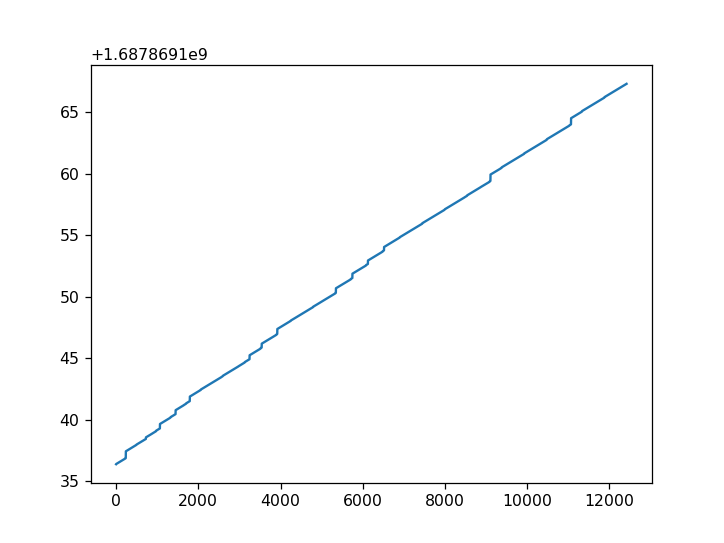

Acc:
[[-0.3047  0.2998 -9.6523]
 [-0.293   0.3545 -9.6816]
 [-0.375   0.3545 -9.7188]
 ...
 [-0.3057  0.3047 -9.5713]
 [-0.3564  0.2852 -9.6328]
 [-0.3008  0.293  -9.5811]]
Gyro:
[[ 0. -0. -0.]
 [ 0.  0.  0.]
 [-0.  0.  0.]
 ...
 [-0. -0.  0.]
 [ 0. -0.  0.]
 [ 0. -0. -0.]]
Mag:
[[ 0.04  0.09  0.5 ]
 [-0.35  1.06 -0.27]
 [-0.35  1.06 -0.27]
 ...
 [-0.34  1.04 -0.26]
 [-0.35  1.04 -0.27]
 [-0.34  1.05 -0.27]]


In [71]:
#convert to float
data = np.array(data).astype(float)

#re-sampling:
#data = resample(data, num = np.shape(quaternion_GT_to_NM)[0])
print(np.shape(data))

#frequency count
IMU_total_time = float(data[-1][0]) - float(data[0][0])
IMU_avg_freq = int(np.shape(data)[0]) / IMU_total_time 
print(IMU_total_time)
print(IMU_avg_freq)
acc_columns = [1,2,3]
gyro_columns = [4,5,6]
mag_columns = [7,8,9]
ypr_columns = [10,11,12]
acc_data = data[:, acc_columns]
gyro_data = data[:, gyro_columns]
mag_data = data[:, mag_columns]
#ypr_data = data[:, ypr_columns]
fig, ax = plt.subplots()
plt.plot(data[:,0])

print("Acc:")
print(acc_data)
print("Gyro:")
print(gyro_data) 
print("Mag:")
print(mag_data) 
#print("Yaw Pitch Rol:")
#print(ypr_data)

In [17]:
#Computing quaternion Mahony
quaternions_IMU = Mahony(gyr=gyro_data, acc=acc_data, mag = mag_data, frequency = IMU_avg_freq).Q   # Using IMU with sample rate 8ms (default)
quaternions_IMU_NM = Mahony(gyr=gyro_data, acc=acc_data, frequency = IMU_avg_freq).Q   # Using IMU with sample rate 8ms (default)
print(np.shape(quaternions_IMU_NM))
for q in quaternions_IMU_NM:
    print(q)

(12419, 4)
[ 1.55224319e-02  9.99755146e-01  2.44823992e-04 -1.57684084e-02]
[ 1.55224319e-02  9.99755146e-01  2.44823992e-04 -1.57684084e-02]
[ 1.55224319e-02  9.99755146e-01  2.44823992e-04 -1.57684084e-02]
[ 1.55224319e-02  9.99755146e-01  2.44823992e-04 -1.57684084e-02]
[ 1.55224319e-02  9.99755146e-01  2.44823992e-04 -1.57684084e-02]
[ 1.55224319e-02  9.99755146e-01  2.44823992e-04 -1.57684084e-02]
[ 1.55224319e-02  9.99755146e-01  2.44823992e-04 -1.57684084e-02]
[ 1.55224319e-02  9.99755146e-01  2.44823992e-04 -1.57684084e-02]
[ 1.55224319e-02  9.99755146e-01  2.44823992e-04 -1.57684084e-02]
[ 1.55224319e-02  9.99755146e-01  2.44823992e-04 -1.57684084e-02]
[ 1.55224319e-02  9.99755146e-01  2.44823992e-04 -1.57684084e-02]
[ 1.55224319e-02  9.99755146e-01  2.44823992e-04 -1.57684084e-02]
[ 1.55224319e-02  9.99755146e-01  2.44823992e-04 -1.57684084e-02]
[ 1.55224319e-02  9.99755146e-01  2.44823992e-04 -1.57684084e-02]
[ 1.55224319e-02  9.99755146e-01  2.44823992e-04 -1.57684084e-02]

[-0.00177026  0.55891679 -0.82898861 -0.01966663]
[-0.00181475  0.55758352 -0.82988607 -0.01965771]
[-0.00186387  0.55625976 -0.83077507 -0.01960584]
[-0.00191196  0.55492369 -0.83166883 -0.01957041]
[-0.00195251  0.55356596 -0.83257448 -0.0195101 ]
[-0.00202015  0.55219611 -0.83348423 -0.01947863]
[-0.00202542  0.55081277 -0.83439794 -0.01952595]
[-0.00206805  0.54945017 -0.83529631 -0.01950135]
[-0.00210363  0.54809603 -0.83618524 -0.01950793]
[-0.0021805   0.54674172 -0.83707283 -0.01943736]
[-0.0022248   0.54536351 -0.83797088 -0.01945515]
[-0.0022472   0.54398338 -0.83886679 -0.01948185]
[-0.00229783  0.54262355 -0.8397471  -0.01947333]
[-0.00231623  0.54126173 -0.84062491 -0.01949695]
[-0.00239414  0.5399108  -0.84149477 -0.01942036]
[-0.00244627  0.53854654 -0.8423682  -0.01942819]
[-0.00250875  0.53717187 -0.84324703 -0.0193528 ]
[-0.00257227  0.53578454 -0.84412937 -0.01933676]
[-0.00258421  0.53438382 -0.84501597 -0.01937174]
[-0.00261846  0.53300375 -0.84588755 -0.01934935]


[-0.01927823 -0.98148187 -0.19028901  0.01057268]
[-0.01925232 -0.98179383 -0.18867385  0.01060192]
[-0.01921037 -0.98210118 -0.18707082  0.01061753]
[-0.01926182 -0.98240415 -0.18546589  0.01065243]
[-0.01921209 -0.9827015  -0.18388651  0.01069589]
[-0.01918511 -0.98299611 -0.18230643  0.01072137]
[-0.01914912 -0.98329048 -0.18071388  0.01075312]
[-0.01907099 -0.98358549 -0.17910887  0.01076558]
[-0.01909025 -0.98387815 -0.17748979  0.01080413]
[-0.01904661 -0.984167   -0.17588371  0.01083811]
[-0.01901951 -0.98445542 -0.1742643   0.01085039]
[-0.01899092 -0.98474087 -0.17264452  0.01089226]
[-0.01897339 -0.98502346 -0.17102411  0.01093347]
[-0.01896564 -0.98530333 -0.1694033   0.01096218]
[-0.01893366 -0.98557909 -0.16779436  0.01097382]
[-0.01897482 -0.98585105 -0.16618387  0.01098076]
[-0.01892841 -0.98611541 -0.16461136  0.01100969]
[-0.01888469 -0.98637727 -0.16303832  0.01103402]
[-0.01882256 -0.98663871 -0.16145312  0.01107508]
[-0.01876907 -0.98690184 -0.1598423   0.01108645]


[0.02204093 0.36098555 0.93228918 0.0063655 ]
[0.02209106 0.3625072  0.93169737 0.00636642]
[0.02206418 0.36401566 0.9311103  0.00627442]
[0.02207633 0.36554768 0.93050955 0.00628523]
[0.02207713 0.36706612 0.92991194 0.00623284]
[0.02207394 0.36859552 0.92930709 0.0061972 ]
[0.02210033 0.37012406 0.92869878 0.00619149]
[0.02206933 0.37163973 0.92809446 0.00612516]
[0.02208742 0.37316663 0.9274811  0.00613288]
[0.02209609 0.3746916  0.92686621 0.00608301]
[0.02210564 0.37620499 0.92625271 0.00608721]
[0.0221277  0.37770532 0.92564151 0.0060712 ]
[0.02209882 0.37919327 0.92503396 0.00602357]
[0.02212276 0.38069173 0.92441777 0.00601543]
[0.0220797  0.3821885  0.92380161 0.00591774]
[0.02211209 0.38370843 0.92317039 0.00594292]
[0.02209905 0.38521492 0.92254349 0.00588259]
[0.02209964 0.3867326  0.92190835 0.00587374]
[0.02213092 0.38824881 0.92127015 0.00586517]
[0.02209123 0.38975246 0.92063639 0.00579899]
[0.02212315 0.39126686 0.91999298 0.00580691]
[0.02211444 0.39276826 0.91935353 

[ 0.010714    0.77914149  0.62673253 -0.00548474]
[ 0.01070155  0.77843104  0.62761552 -0.00541769]
[ 0.01065407  0.77770378  0.62851761 -0.0053796 ]
[ 0.01068118  0.7769751   0.62941817 -0.00532664]
[ 0.01072081  0.7762292   0.63033728 -0.00531144]
[ 0.01070261  0.77547446  0.63126587 -0.00531174]
[ 0.01064693  0.77471912  0.63219374 -0.00529148]
[ 0.01065712  0.77397012  0.63311048 -0.0052722 ]
[ 0.01063899  0.77322009  0.63402667 -0.00526143]
[ 0.0106312   0.7724692   0.63494174 -0.00522525]
[ 0.01064908  0.77171731  0.63585554 -0.00516917]
[ 0.01063081  0.77095657  0.63677851 -0.00510667]
[ 0.0105541   0.77017866  0.63772053 -0.00509469]
[ 0.01057385  0.76941553  0.63864106 -0.00505275]
[ 0.01053616  0.76865132  0.6395614  -0.00503571]
[ 0.01049108  0.76788586  0.64048111 -0.0050189 ]
[ 0.01050852  0.76712728  0.64138955 -0.00497458]
[ 0.01051406  0.76635956  0.64230682 -0.00494233]
[ 0.01054209  0.76559055  0.64322298 -0.00491747]
[ 0.01053947  0.76481257  0.64414806 -0.00489171]


[-0.00778313 -0.97641368  0.21565856  0.0068648 ]
[-0.0077956  -0.97676462  0.21406371  0.00684285]
[-0.00782399 -0.97711003  0.21248061  0.00683841]
[-0.00786091 -0.97745278  0.21089696  0.00683651]
[-0.00776874 -0.97779424  0.20931247  0.0068084 ]
[-0.00787234 -0.97812583  0.20775199  0.00685484]
[-0.0078798  -0.97845869  0.20617874  0.00684249]
[-0.00793641 -0.97879092  0.20459296  0.00686052]
[-0.00795446 -0.97912616  0.20298219  0.00685003]
[-0.00797024 -0.97945854  0.20137063  0.00687796]
[-0.00795396 -0.97978879  0.1997586   0.00686734]
[-0.00798025 -0.98011355  0.19815834  0.00685744]
[-0.00799703 -0.98043335  0.19656976  0.00684287]
[-0.00798154 -0.98075342  0.19496849  0.00680579]
[-0.00804748 -0.98106749  0.19337894  0.00681165]
[-0.00804008 -0.98138224  0.19177661  0.0067818 ]
[-0.00799521 -0.98169219  0.19018583  0.00677353]
[-0.00804686 -0.98199386  0.18861931  0.00678708]
[-0.00807359 -0.98229793  0.18702772  0.00679893]
[-0.00809952 -0.98260186  0.18542332  0.0067959 ]


[-0.01140559  0.25302981 -0.96738234 -0.00415178]
[-0.01139586  0.25462163 -0.96696492 -0.00409886]
[-0.01136249  0.25618797 -0.96655148 -0.00410541]
[-0.0113336   0.25774175 -0.96613867 -0.00409965]
[-0.01132648  0.2592945  -0.96572308 -0.00412461]
[-0.01129759  0.26084639 -0.96530523 -0.00416527]
[-0.01126699  0.26242232 -0.96487842 -0.00414885]
[-0.01125355  0.26398459 -0.96445205 -0.00421163]
[-0.01124006  0.26555904 -0.96401992 -0.0042015 ]
[-0.01121761  0.26713231 -0.96358527 -0.00423263]
[-0.0111863   0.2687051  -0.96314819 -0.00424345]
[-0.01115199  0.27027745 -0.96270859 -0.00423138]
[-0.01113414  0.27184785 -0.96226613 -0.00432133]
[-0.01114044  0.27344348 -0.96181418 -0.00424628]
[-0.01112303  0.27500132 -0.96137006 -0.00426275]
[-0.01109468  0.27655881 -0.96092357 -0.00424691]
[-0.0110767   0.2781031  -0.96047785 -0.00427478]
[-0.01104814  0.27964634 -0.96002974 -0.00433233]
[-0.01103761  0.28121403 -0.95957203 -0.00428406]
[-0.01100536  0.28276769 -0.95911544 -0.00434681]


[ 0.02092722  0.78509053  0.61898901 -0.00689254]
[ 0.02096276  0.78487374  0.61926259 -0.00690013]
[ 0.02098012  0.78465707  0.61953626 -0.00692343]
[ 0.02099767  0.78444019  0.61981009 -0.00693739]
[ 0.02101297  0.78422324  0.6200839  -0.00695144]
[ 0.02102818  0.78401395  0.62034784 -0.00696396]
[ 0.02106556  0.78380443  0.62061122 -0.00696914]
[ 0.02106167  0.78360323  0.62086525 -0.00698072]
[ 0.02106999  0.78340185  0.62111895 -0.00698915]
[ 0.02108695  0.78320018  0.6213725  -0.00700312]
[ 0.02112322  0.78299824  0.62162576 -0.00699891]
[ 0.02114993  0.78279624  0.62187919 -0.00700013]
[ 0.02116395  0.78259405  0.62213296 -0.00701481]
[ 0.02119197  0.78239175  0.62238632 -0.0070223 ]
[ 0.02121503  0.78218934  0.62263977 -0.00703475]
[ 0.02123606  0.78199478  0.62288334 -0.00703861]
[ 0.02123708  0.78180825  0.62311725 -0.00705236]
[ 0.02126411  0.78162116  0.62335091 -0.00705991]
[ 0.02128388  0.7814342   0.6235844  -0.00707698]
[ 0.02130398  0.78125512  0.62380797 -0.00708392]


[ 0.02571365  0.77933951  0.62601038 -0.0089294 ]
[ 0.02571365  0.77933951  0.62601038 -0.0089294 ]
[ 0.02571365  0.77933951  0.62601038 -0.0089294 ]
[ 0.02571365  0.77933951  0.62601038 -0.0089294 ]
[ 0.02571365  0.77933951  0.62601038 -0.0089294 ]
[ 0.02571365  0.77933951  0.62601038 -0.0089294 ]
[ 0.02571365  0.77933951  0.62601038 -0.0089294 ]
[ 0.02571365  0.77933951  0.62601038 -0.0089294 ]
[ 0.02571365  0.77933951  0.62601038 -0.0089294 ]
[ 0.02571365  0.77933951  0.62601038 -0.0089294 ]
[ 0.02571365  0.77933951  0.62601038 -0.0089294 ]
[ 0.02571365  0.77933951  0.62601038 -0.0089294 ]
[ 0.02571365  0.77933951  0.62601038 -0.0089294 ]
[ 0.02571365  0.77933951  0.62601038 -0.0089294 ]
[ 0.02571365  0.77933951  0.62601038 -0.0089294 ]
[ 0.02571365  0.77933951  0.62601038 -0.0089294 ]
[ 0.02571365  0.77933951  0.62601038 -0.0089294 ]
[ 0.02571365  0.77933951  0.62601038 -0.0089294 ]
[ 0.02571365  0.77933951  0.62601038 -0.0089294 ]
[ 0.02571365  0.77933951  0.62601038 -0.0089294 ]


[ 0.02583695  0.77933764  0.62600665 -0.00899834]
[ 0.02583695  0.77933764  0.62600665 -0.00899834]
[ 0.02583695  0.77933764  0.62600665 -0.00899834]
[ 0.02583695  0.77933764  0.62600665 -0.00899834]
[ 0.02583695  0.77933764  0.62600665 -0.00899834]
[ 0.02583695  0.77933764  0.62600665 -0.00899834]
[ 0.02583695  0.77933764  0.62600665 -0.00899834]
[ 0.02583695  0.77933764  0.62600665 -0.00899834]
[ 0.02583695  0.77933764  0.62600665 -0.00899834]
[ 0.02583695  0.77933764  0.62600665 -0.00899834]
[ 0.02583695  0.77933764  0.62600665 -0.00899834]
[ 0.02583695  0.77933764  0.62600665 -0.00899834]
[ 0.02583695  0.77933764  0.62600665 -0.00899834]
[ 0.02583695  0.77933764  0.62600665 -0.00899834]
[ 0.02583695  0.77933764  0.62600665 -0.00899834]
[ 0.02583695  0.77933764  0.62600665 -0.00899834]
[ 0.02583695  0.77933764  0.62600665 -0.00899834]
[ 0.02583695  0.77933764  0.62600665 -0.00899834]
[ 0.02583695  0.77933764  0.62600665 -0.00899834]
[ 0.02583695  0.77933764  0.62600665 -0.00899834]


In [27]:
#num_samples = np.shape(gyro_data)[0]
orientation = Mahony()
quaternions = np.tile(quaternions_IMU[0], (num_samples, 1)) # Allocate for quaternions
for t in range(1, num_samples):
    quaternions[t] = orientation.updateMARG(quaternions[t-1], gyr=gyro_data[t], acc=acc_data[t], mag=mag_data[t], dt = 1./125. )
print(quaternions)

# Visualise

In [12]:
def get_arrow(num, orientation):
    pitch = np.radians(orientation[num, 1])
    yaw = np.radians(orientation[num, 2])
    u = np.sin(yaw)*np.cos(pitch)
    v = np.cos(yaw)*np.cos(pitch)
    w = np.sin(pitch)
    return 0,0,0,u,v,w

def get_arrow_q(num, quaternions, InitialPerspectiveVector):
    u, v, w = Quaternion(quaternions[num]).rotate(InitialPerspectiveVector)
    return 0,0,0,u,v,w

def get_arrow_unwinded(num, quaternions, Vector):
    u_u, v_u, w_u = Quaternion(quaternions[num]).inverse.rotate(Vector)
    return 0,0,0,u_u,v_u,w_u


In [ ]:
#Vector from sensor
%matplotlib notebook
%matplotlib notebook

WantToClear = 1

orientation = ypr_data

fig, ax = plt.subplots(subplot_kw=dict(projection="3d"))
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)

ax.quiver(-1, 0, 0, 3, 0, 0, color='#aaaaaa',linestyle='dashed')
ax.quiver(0, -1, 0, 0, 3, 0, color='#aaaaaa',linestyle='dashed')
ax.quiver(0, 0, -1, 0, 0, 3, color='#aaaaaa',linestyle='dashed')
    
def update1(num, Q, X):
    if (WantToClear):
        ax.clear()  
        ax.quiver(-1, 0, 0, 3, 0, 0, color='#aaaaaa',linestyle='dashed')
        ax.quiver(0, -1, 0, 0, 3, 0, color='#aaaaaa',linestyle='dashed')
        ax.quiver(0, 0, -1, 0, 0, 3, color='#aaaaaa',linestyle='dashed')
        ax.set_xlim(-1, 1)
        ax.set_ylim(-1, 1)
        ax.set_zlim(-1, 1)
    Qui = ax.quiver(*get_arrow(num, orientation), length=1, normalize=True)

Qui = ax.quiver(*get_arrow(0, orientation), length=1, normalize=True)  
ani = FuncAnimation(fig, update1, fargs=(Qui, Qui), frames=range(0, np.shape(orientation)[0]), interval=1, blit=True, repeat = False)
plt.show()

In [ ]:
#Quaternion from IMU (Mahony)
%matplotlib notebook
%matplotlib notebook

quaternions = quaternions_IMU_NM
WantToClear = 1
InitialPerspectiveVector = [1.0, 0.0, 0.0]
x0, y0, z0, u0, v0, w0 = get_arrow_q(0, quaternions, InitialPerspectiveVector)
#
fig, ax = plt.subplots(subplot_kw=dict(projection="3d"))
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)
ax.quiver(-1, 0, 0, 3, 0, 0, color='#aaaaaa',linestyle='dashed')
ax.quiver(0, -1, 0, 0,3, 0, color='#aaaaaa',linestyle='dashed')
ax.quiver(0, 0, -1, 0, 0, 3, color='#aaaaaa',linestyle='dashed')

def update2(num, Q, X):
    if (WantToClear):
        ax.clear()  
        ax.quiver(-1, 0, 0, 3, 0, 0, color='#aaaaaa',linestyle='dashed')
        ax.quiver(0, -1, 0, 0,3, 0, color='#aaaaaa',linestyle='dashed')
        ax.quiver(0, 0, -1, 0, 0, 3, color='#aaaaaa',linestyle='dashed')
        ax.set_xlim(-1, 1)
        ax.set_ylim(-1, 1)
        ax.set_zlim(-1, 1) 
        x, y, z, u, v, w = get_arrow_q(num, quaternions, InitialPerspectiveVector)
    Qui = ax.quiver([x,x0], [y,y0], [z,z0], [u,u0], [v,v0], [w,w0], length=1, normalize=True, color = ['blue', 'green'])

Qui = ax.quiver([x0,x0], [y0,y0], [z0,z0], [u0,u0], [v0,v0], [w0,w0], length=1, normalize=True, color = ['green', 'green'])  
ani = FuncAnimation(fig, update2, fargs=(Qui, Qui), frames=range(0, np.shape(quaternions)[0]), interval=0.1, blit=True, repeat = False)
plt.show()

In [ ]:
#Comparing Ground-Truth and IMU (Mahony)
%matplotlib notebook
%matplotlib notebook

WantToClear = 1

#orientation = ypr_data
GT_q = quaternion_GT
IMU_q = quaternions_IMU_NM

InitialPerspectiveVector = [1,0,0]
x0, y0, z0, u0, v0, w0 = get_arrow_q(0, GT_q, InitialPerspectiveVector)

#
fig, ax = plt.subplots(subplot_kw = dict(projection="3d"))
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)
ax.quiver(-1, 0, 0, 3, 0, 0, color = '#aaaaaa',linestyle = 'dashed')
ax.quiver(0, -1, 0, 0, 3, 0, color = '#aaaaaa',linestyle = 'dashed')
ax.quiver(0, 0, -1, 0, 0, 3, color = '#aaaaaa',linestyle = 'dashed')
    
    
def update3(num, Q, X):
    if (WantToClear):
        ax.clear()
        ax.quiver(-1, 0, 0, 3, 0, 0, color = '#aaaaaa',linestyle = 'dashed')
        ax.quiver(0, -1, 0, 0, 3, 0, color = '#aaaaaa',linestyle = 'dashed')
        ax.quiver(0, 0, -1, 0, 0, 3, color = '#aaaaaa',linestyle = 'dashed')
        ax.set_xlim(-1, 1)
        ax.set_ylim(-1, 1)
        ax.set_zlim(-1, 1) 
        #x, y, z, u, v, w = get_arrow(num, orientation)
        x, y, z, u, v, w = get_arrow_q(num, GT_q, InitialPerspectiveVector)
        x_q, y_q, z_q, u_q, v_q, w_q = get_arrow_q(num, IMU_q, InitialPerspectiveVector)
    Qui = ax.quiver([x,x_q,x0], [y,y_q,y0], [z, z_q,z0], [u, u_q,u0], [v,v_q,v0], [w,w_q,w0], length=1, normalize=True, color = ['blue','red','green'])

Qui = ax.quiver([x0,x0], [y0,y0], [z0,z0], [u0,u0], [v0,v0], [w0,w0], length=1, normalize=True, color = ['green','green'])  
ani = FuncAnimation(fig, update3, fargs=(Qui, Qui), frames=range(0, np.shape(quaternions)[0]), interval=2, blit=True, repeat = False)
plt.show()


<IPython.core.display.Javascript object>


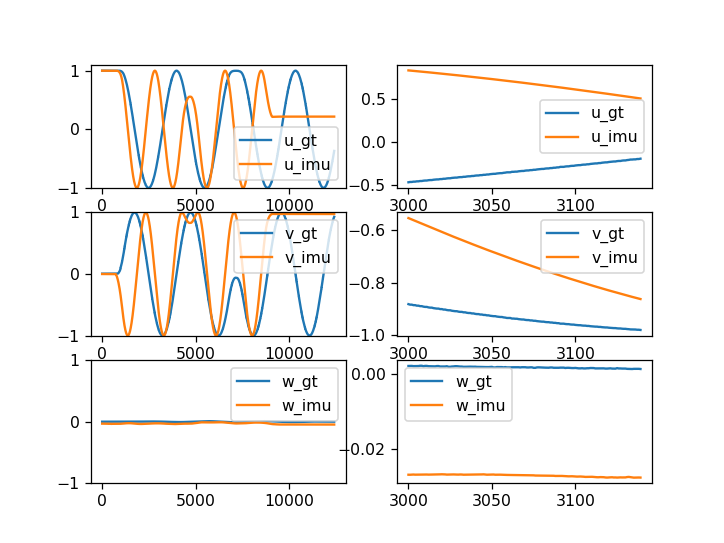

In [85]:
#Comparing Ground-Truth and IMU (Mahony) - plot
%matplotlib notebook
%matplotlib notebook

GT_q =  quaternion_GT_to_NM #quaternion_GT_pre 
IMU_q = quaternions_IMU_NM

InitialPerspectiveVector = [1.0, 0.0, 0.0] 
x0, y0, z0, u0, v0, w0 = get_arrow_q(0, GT_q, InitialPerspectiveVector)

full_frames = np.minimum(np.shape(GT_q)[0],np.shape(IMU_q)[0])
zoom_frames = (3000, 3140)

data = np.zeros((full_frames, 6))

for i in range(0, full_frames):
    x, y, z, u, v, w = get_arrow_q(i, GT_q, InitialPerspectiveVector)
    x_imu, y_imu, z_imu, u_imu, v_imu, w_imu = get_arrow_q(i, IMU_q, InitialPerspectiveVector)
    
    ##test
    #x, y, z, u, v, w = get_arrow_q(i, quaternions_IMU_pre, InitialPerspectiveVector_IMU)
    #x, y, z, u, v, w =  get_arrow_q(i, quaternions_IMU_pre_NM, InitialPerspectiveVector_IMU)
    
    #x_imu, y_imu, z_imu, u_imu, v_imu, w_imu = get_arrow_q(i, quaternions_IMU_pre_NM, InitialPerspectiveVector_IMU)
    #x_imu, y_imu, z_imu, u_imu, v_imu, w_imu = get_arrow_q(i, quaternions_IMU_pre, InitialPerspectiveVector_IMU)
    #x_imu, y_imu, z_imu, u_imu, v_imu, w_imu = get_arrow(i, ypr_data)
    ## end test
    
    data[i] = (u, v, w, u_imu, v_imu, w_imu)

fig = plt.figure()
ax = plt.subplot(321)
ax.set_ylim(-1, 1.1)
ax.plot(range(0, full_frames), data[:,[0,3]])
ax.legend(['u_gt', 'u_imu'])
ax = plt.subplot(323)
ax.set_ylim(-1, 1)
ax.plot(range(0, full_frames), data[:,[1,4]])
ax.legend(['v_gt', 'v_imu'])
ax = plt.subplot(325)
ax.set_ylim(-1, 1)
ax.plot(range(0, full_frames), data[:,[2,5]])
ax.legend(['w_gt', 'w_imu'])

ax = plt.subplot(322)
ax.plot(range(zoom_frames[0], zoom_frames[1]), data[zoom_frames[0]: zoom_frames[1],[0,3]])
ax.legend(['u_gt', 'u_imu'])
ax = plt.subplot(324)
ax.plot(range(zoom_frames[0], zoom_frames[1]), data[zoom_frames[0]: zoom_frames[1],[1,4]])
ax.legend(['v_gt', 'v_imu'])
ax = plt.subplot(326)
ax.plot(range(zoom_frames[0], zoom_frames[1]), data[zoom_frames[0]: zoom_frames[1],[2,5]])
ax.legend(['w_gt', 'w_imu'])

fig.show()

# Unwinding: TODO

In [ ]:
#Unwinding the Ground-Truth by the reverse of quaternion from IMU (Mahony)
%matplotlib notebook
%matplotlib notebook

WantToClear = 1

orientation = ypr_data

x0, y0, z0, u0, v0, w0 = get_arrow(0, orientation)
InitialPerspectiveVector = [1,0,0]

#
fig, ax = plt.subplots(subplot_kw=dict(projection="3d"))
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)
ax.quiver(-1, 0, 0, 3, 0, 0, color='#aaaaaa',linestyle='dashed')
ax.quiver(0, -1, 0, 0,3, 0, color='#aaaaaa',linestyle='dashed')
ax.quiver(0, 0, -1, 0, 0, 3, color='#aaaaaa',linestyle='dashed')

    
def update4(num, Q, X):
    if (WantToClear):
        ax.clear()  
        ax.quiver(-1, 0, 0, 3, 0, 0, color='#aaaaaa',linestyle='dashed')
        ax.quiver(0, -1, 0, 0, 3, 0, color='#aaaaaa',linestyle='dashed')
        ax.quiver(0, 0, -1, 0, 0, 3, color='#aaaaaa',linestyle='dashed')
        ax.set_xlim(-1, 1)
        ax.set_ylim(-1, 1)
        ax.set_zlim(-1, 1) 
        x, y, z, u, v, w = get_arrow(num, orientation)
        x_u, y_u, z_u, u_u, v_u, w_u = get_arrow_unwinded(num, quaternions, [u, v, w])
    Qui = ax.quiver([x,x_u,x0], [y,y_u,y0], [z, z_u,z0], [u, u_u,u0], [v,v_u,v0], [w,w_u,w0], length=1, normalize=True, color = ['red','blue', 'green'])

Qui = ax.quiver([x0,x0], [y0,y0], [z0,z0], [u0,u0], [v0,v0], [w0,w0], length=1, normalize=True, color = ['red','green'])  
ani = FuncAnimation(fig, update4, fargs=(Qui, Qui), frames=range(0, np.shape(quaternions)[0]), interval=2, blit=True, repeat = False)
plt.show()



In [ ]:
#Unwinding the Ground-Truth by the reverse of quaternion from IMU (Mahony) - plot
InitialPerspectiveVector = [1,0,0]

full_frames = np.shape(quaternions)[0] 
zoom_frames = (500, 640)

data = np.zeros((full_frames, 6))
for i in range(0, full_frames):
    x, y, z, u, v, w = get_arrow(i, orientation)
    x_u, y_u, z_u, u_u, v_u, w_u = get_arrow_unwinded(i, quaternions, [u, v, w])
    data[i] = (u, v, w, u_u, v_u, w_u)

fig = plt.figure()
ax = plt.subplot(321)
ax.set_ylim(-1, 1.2)
ax.plot(range(0, full_frames), data[:,[0,3]])
ax.legend(['u_df', 'u_u'])
ax = plt.subplot(323)
ax.set_ylim(-1, 1)
ax.plot(range(0, full_frames), data[:,[1,4]])
ax.legend(['v_df', 'v_u'])
ax = plt.subplot(325)
ax.set_ylim(-1, 1)
ax.plot(range(0, full_frames), data[:,[2,5]])
ax.legend(['w_df', 'w_u'])

ax = plt.subplot(322)
ax.plot(range(zoom_frames[0], zoom_frames[1]), data[zoom_frames[0]: zoom_frames[1],[0,3]])
ax.legend(['u_df', 'u_u'])
ax = plt.subplot(324)
ax.plot(range(zoom_frames[0], zoom_frames[1]), data[zoom_frames[0]: zoom_frames[1],[1,4]])
ax.legend(['v_df', 'v_u'])
ax = plt.subplot(326)
ax.plot(range(zoom_frames[0], zoom_frames[1]), data[zoom_frames[0]: zoom_frames[1],[2,5]])
ax.legend(['w_df', 'w_u'])

fig.show()

In [128]:
#playground
q = Quaternion([0.0, 0.707, 0.707, 0.0])
q1 = Quaternion(axis=[0.0, 1.0, 0.0], degrees=180)
print(q1)
#print(q2* q1 * Y)
print(q1 * q * q1.inverse)

0.000 +0.000i +1.000j +0.000k
0.000 -0.707i +0.707j -0.000k


(1130,)


<IPython.core.display.Javascript object>


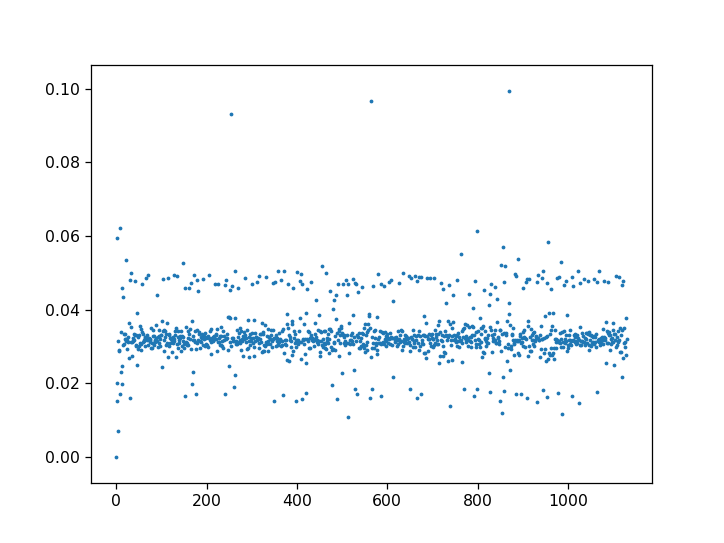

In [107]:
#Cam
f_name = '/home/kuli/Desktop/WeAreVR/Measurements/cam.txt'
data = []
with open(f_name, 'r') as f:
    for line in f:
        try:
            number = float(line.strip())
            data.append(number)
        except ValueError:
            number = 0
print(np.shape(data))
CAM_data = data
fig = plt.figure()
ax = plt.subplot(111)
ax.scatter(range(np.shape(CAM_data)[0]),CAM_data, s = 2)

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import multiprocessing
from multiprocessing import Process
from numpy import asarray
from numpy import savetxt

def plot_quiver(ax, flow, spacing, margin=0, **kwargs):
    """Plots less dense quiver field.

    Args:
        ax: Matplotlib axis
        flow: motion vectors
        spacing: space (px) between each arrow in grid
        margin: width (px) of enclosing region without arrows
        kwargs: quiver kwargs (default: angles="xy", scale_units="xy")
    """
    h, w, *_ = flow.shape

    nx = int((w - 2 * margin) / spacing)
    ny = int((h - 2 * margin) / spacing)

    x = np.linspace(margin, w - margin - 1, nx, dtype=np.int64)
    y = np.linspace(margin, h - margin - 1, ny, dtype=np.int64)

    flow = flow[np.ix_(y, x)]
    u = flow[:, :, 0]
    v = flow[:, :, 1]

    kwargs = {**dict(angles="xy", scale_units="xy"), **kwargs}
    ax.quiver(x, y, u, v, **kwargs)

    ax.set_ylim(sorted(ax.get_ylim(), reverse=True))
    ax.set_aspect("equal")
    
def calcDiff(i, old_gray, frame_gray, flows, diffs):
    flow = cv2.calcOpticalFlowFarneback(np.array(old_gray), 
                                       np.array(frame_gray), 
                                       None, 0.5, 3, 25, 3, 5, 1.2, 0) #0.5, 3, 15, 3, 5, 1.2, 0
    #flows[i] = flow
    diffs.put(np.sum(abs(flow))) #diffs[i]= np.sum(abs(flow))
    
def calcDiffBatch(startIdx, batchSize, flows, diffs):
    for i in range(startIdx, startIdx + batchSize):
        cap.set(cv2.CAP_PROP_FRAME_COUNT, i)
        ret,frame = cap.read()
        if ret == False or i == videoFramesNum:
            break
        if i == startIdx: 
            old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)
            continue
        frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        flow = cv2.calcOpticalFlowFarneback(np.array(old_gray), 
                                           np.array(frame_gray), 
                                           None, 0.5, 3, 25, 3, 5, 1.2, 0) #0.5, 3, 15, 3, 5, 1.2, 0
        old_gray = frame_gray
        #flows[i] = flow
        diffs[i]= np.sum(np.abs(flow))
        print("proc" + i + "ended")

In [30]:
fname = 'Movie_008.mp4'

cap = cv2.VideoCapture('./vid/' + fname)
ret, old_frame = cap.read()
if ret == False:
    print("no such file")
old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)
frame_gray = old_gray
manager = multiprocessing.Manager()
flows = manager.dict() 
diffs = multiprocessing.Queue() #manager.dict() 
i = 0
#
procs = []
proc = Process(target=calcDiff, args=(i, old_gray, frame_gray, flows, diffs))  # instantiating without any argument
procs.append(proc)
proc.start()
#p = Process(target=calcDiff)

while(1):
    ret,frame = cap.read()
    if ret == False:
        break
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    #
    proc = Process(target=calcDiff, args=(i, old_gray, frame_gray, flows, diffs))
    procs.append(proc)
    proc.start()
    #
    old_gray = frame_gray.copy()
    i = i + 1
    
for proc in procs:
    proc.join(1)

cap.release()
#fig, ax = plt.subplots()
#plot_quiver(ax, flows[100], spacing=10, scale=1, color="#ff44ff")

KeyboardInterrupt: 

Process Process-985:
Traceback (most recent call last):
  File "/usr/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/usr/lib/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-29-675380da53e3>", line 38, in calcDiff
    flow = cv2.calcOpticalFlowFarneback(np.array(old_gray),
KeyboardInterrupt
Process Process-986:
Traceback (most recent call last):
  File "/usr/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/usr/lib/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-29-675380da53e3>", line 38, in calcDiff
    flow = cv2.calcOpticalFlowFarneback(np.array(old_gray),
KeyboardInterrupt


In [39]:
fname = 'Movie_008.mp4'

cap = cv2.VideoCapture('./vid/' + fname)
ret, old_frame = cap.read()
if ret == False:
    print("no such file")
manager = multiprocessing.Manager()
flows = manager.dict() 
diffs = manager.dict() 

videoFramesNum = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
batchNumLimit = 15
batchSize = int(videoFramesNum / batchLimit) + 1
print(length)
for i in range(batchNumLimit):
    startIdx = i * batchSize
    proc = Process(target=calcDiffBatch, args=(startIdx, batchSize, flows, diffs))
    procs.append(proc)
    proc.start()
    #take frames here,
for proc in procs:
    proc.join(60)

cap.release()
#fig, ax = plt.subplots()
#plot_quiver(ax, flows[100], spacing=10, scale=1, color="#ff44ff")

cap = cv2.VideoCapture('./vid/' + fname)

cap.release()

949


KeyboardInterrupt: 

In [ ]:
print(diffs.qsize())
result = np.empty(diffs.qsize())
idx = 0
for item in iter(diffs.get, 'STOP'):
    result[idx] = item
    idx = idx + 1

In [27]:
data = asarray(result)
savetxt('./vdata/' + fname + '.csv', data, delimiter=',')

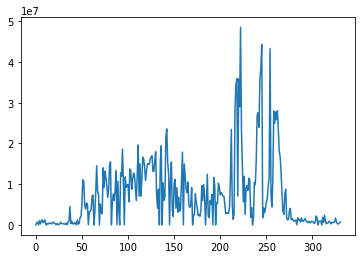

In [28]:
# load data from csv file
from numpy import loadtxt
#fname = 'Movie_005.mp4' 
data = loadtxt('./vdata/'+ fname +'.csv', delimiter=',')
# print the array
plt.plot(data)

# Notes for myself

## Start the measurement of FSM-9 Sensor
- edit src code (e.g. off the energy-safe mode)
- cmake genarate with cmake-gui (on the python2.7 env)
- make the generated files (on the python2.7 env)
- run the .bin file with 'sudo' (!): sudo /home/kuli/Desktop/WeAreVR/fsm9/build/libfree-examples/game3d_example > ~/Desktop/WeAreVR/Measurements/imu_position_test.csv
(un-plug and plug is the best debug)

## UniversalRobot setup (ur10e)
- safety password = easybot
- Ros2 (galactic)
- UrDriver (for galactic)
- Ros Controller
- setup Robot (e.g. 192.168.20.129 /255.255.255.0)
- setup LAN (e.g. 192.168.20.128 /255.255.255.0)
- set: /opt/ros/galactic/share/ur_bringup/launch/ur_control.launch.py - publish_frequency to 500
- suggestion: increase update rates: /opt/ros/galactic/share/ur_bringup/config/ur_controllers.yaml

### Unity-ROC connection setup
- ROS tcp Connector
- ROS tcp Endpoint
source /opt/ros/galactic/setup.bash <br>
source ~/ros2_ws/install/setup.bash  <br>
ros2 run ros_tcp_endpoint default_server_endpoint --ros-args -p ROS_IP:=192.168.68.130

### Test measurement of robot position (on py38 environment)
- conda activate py38
- source /opt/ros/galactic/setup.bash
- ros2 launch ur_bringup ur_control.launch.py ur_type:=ur10e robot_ip:=192.168.20.129 launch_rviz:=true tool_tcp_port:=50002 
<br> or <br> 
- ros2 launch ur_bringup ur_control.launch.py ur_type:=ur10e robot_ip:=192.168.20.129 launch_rviz:=false tool_tcp_port:=50002 
- *put play on the teach panel, wait for command request (if you want to controll remotely)
- ros2 launch ur_bringup test_scaled_joint_trajectory_controller.launch.py
- *ros2 topic echo /joint_states --field position --csv > ~/Desktop/WeAreVR/Measurements/robot_position_test.csv
Better (absolute angle) 500Hz:
- ros2 run tf2_ros tf2_echo base_link wrist_3_link 500 > ~/Desktop/WeAreVR/Measurements/robot_position_test.csv 


#### new ROS Topic
in ros_workspace: (build pachage first)
- sudo colcon build --packages-select tf2_workshop
- cd ~/ros2_ws
- . install/setup.bash
- ros2 run tf2_workshop publisher tool0 base_link
- *(Test) ros2 topic echo tool0

### pre test (needed)
source /opt/ros/galactic/setup.bash  <br>
sudo /home/kuli/Desktop/WeAreVR/fsm9/build_dev/game3d_example  <br>
ros2 run tf2_ros tf2_echo base_link wrist_3_link 500
###  test data gathering
sudo /home/kuli/Desktop/WeAreVR/fsm9/build_dev/game3d_example > ~/Desktop/WeAreVR/Measurements/imu_position_dev.csv & ros2 run tf2_ros tf2_echo base_link wrist_3_link 500  > ~/Desktop/WeAreVR/Measurements/robot_position_dev.csv  <br>
sudo kill -SIGINT nr
### IMU to ROS
sudo /home/kuli/Desktop/WeAreVR/fsm9/build_dev/game3d_example | ros2 run tf2_workshop IMU

### ROS conroller fo UR robot (really moody)
- ros2 launch ur_bringup ur_control.launch.py ur_type:=ur10e robot_ip:=192.168.20.129 launch_rviz:=false tool_tcp_port:=50002 initial_joint_controller:=joint_trajectory_controller 
- ros2 launch ur_bringup test_joint_trajectory_controller.launch.py
- Turn on the remote controll program on teach panel
##### Frequency:
- UR10e (robot) freq = 500 in theory but -> /opt/ros/galactic/share/ur_bringup/launch/ur_launch.launch.py publishes on tf (ros2 topic hz tf) with 'average rate: ~330Hz'
- IMU freq = 480-500Hz -> receiving(real) 380-408Hz


### Jupyter Notebook struggles
- install lib's using: <br>
import sys <br>
!{sys.executable} -m pip install libx <br>

In [1]:
import sys
!{sys.executable} -m pip install SciPy
